In [1]:
14*3

42

In [41]:
#
#
# titanic.py
#
#

import numpy as np
from sklearn import datasets
from sklearn import cross_validation
import pandas as pd

# For Pandas's read_csv, use header=0 when you know row 0 is a header row
# df here is a "dataframe":
df = pd.read_csv('titanic.csv', header=0)
# df.head()
# df.info()

# let's drop columns with too few values or that won't be meaningful
# Here's an example of dropping the 'body' column:
drop_col = ['body','boat','home.dest','ticket','cabin']

for col in drop_col:
    df = df.drop(col, axis=1)  # axis = 1 means column

# let's drop all of the rows with missing data:
df = df.dropna()


df_names = df['name'] #extracting a column of names so that we can find them later
df_names.to_csv('names.csv')
df = df.drop('name', axis = 1)

# let's see our dataframe again...
# I ended up with 1001 rows (anything over 500-600 seems reasonable)
# _Don't_ use the result if it has fewer than 500 rows!
# Instead, drop more columns BEFORE the df = df.dropna() call...
# df.head()
# df.info()

In [42]:
# You'll need conversion to numeric datatypes for all input columns
#   Here's one example
#
def tr_mf(s):
    """ from string to number
    """
    d = { 'male':0, 'female':1 }
    return d[s]

def embark(s):
    """turn port into number
    0 is Cherbourg
    1 is Queenstown
    2 is Southampton
    """
    d = {'C':0, 'Q':1, 'S':2}
    return d[s]

df['sex'] = df['sex'].map(tr_mf)  # apply the function to the column
df['embarked'] = df['embarked'].map(embark)

# let's see our dataframe again...
# df.head()
# df.info()


# sending out dataframe to csv so we can see it
df.to_csv('mod_titanic.csv')

print("+++ end of pandas +++\n")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1308
Data columns (total 8 columns):
pclass      1043 non-null int64
survived    1043 non-null int64
sex         1043 non-null int64
age         1043 non-null float64
sibsp       1043 non-null int64
parch       1043 non-null int64
fare        1043 non-null float64
embarked    1043 non-null int64
dtypes: float64(2), int64(6)
memory usage: 73.3 KB
+++ end of pandas +++



In [65]:
print("+++ start of numpy/scikit-learn +++")

# Note that you'll likely split cell this into multiple cells...

#
# Let's convert parts of the dataframe, df, to a numpy array
# 

#
# you can take away the top 42 passengers (with unknown survival/perish data) here:
#

df_mod = df[42:] #taking away passengers with unkown survival

# extract the underlying data with the values attribute:
X_data = df_mod.drop('survived', axis=1).values        # everything except the 'survival' column
y_data = df_mod[ 'survived' ].values      # also addressable by column name(s)

# feature engineering...
#X_data[:,0] *= 100   # maybe the first column is worth much more!
#X_data[:,3] *= 100   # maybe the fourth column is worth much more!

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

# cross-validate (use part of the training data for training - and part for testing)
#   first, create cross-validation data (here 3/4 train and 1/4 test)
cv_data_train, cv_data_test, cv_target_train, cv_target_test = \
    cross_validation.train_test_split(X_data, y_data, test_size=0.25) # random_state=0 
    
knn.fit(cv_data_train, cv_target_train) 
print("KNN cv training-data score:", knn.score(cv_data_train,cv_target_train))
print("KNN cv testing-data score:", knn.score(cv_data_test,cv_target_test))

+++ start of numpy/scikit-learn +++
KNN cv training-data score: 0.712
KNN cv testing-data score: 0.653386454183


In [96]:
# This cell finds the best k value

#initializing info for best k
best_k = 0
highest_ac = 0
best_k_info = (best_k, highest_ac)

#initializing how many k values will be tried and how many samples of each will be taken
k_max = 100
num_samples = 1000

#importing useful function
from sklearn.neighbors import KNeighborsClassifier

#looping through k values up to k_max and taking num_samples samples for each to find best k
all_ac = []
for i in range(k_max):
    k = i + 1
    ac_counter = 0
    knn = KNeighborsClassifier(n_neighbors=k)
    for j in range(num_samples):
        cv_data_train, cv_data_test, cv_target_train, cv_target_test = \
            cross_validation.train_test_split(X_data, y_data, test_size=0.25)
        knn.fit(cv_data_train, cv_target_train)
        train_score = knn.score(cv_data_train,cv_target_train)
        test_score = knn.score(cv_data_test,cv_target_test)
        ac_counter += test_score

    ac_avg = ac_counter/num_samples
    all_ac.append(ac_avg)
    print(ac_avg)
    
    
    if ac_avg > best_k_info[1]:
        best_k_info = (k,ac_avg)
print("the best k is",best_k_info[0])

knn = KNeighborsClassifier(n_neighbors=best_k_info[0])

0.641466135458
0.652565737052
0.661864541833
0.666003984064
0.663071713147
0.665211155378
0.66209561753
0.663816733068
0.667844621514
0.668641434263
0.672067729084
0.674235059761
0.675310756972
0.677521912351
0.676370517928
0.676338645418
0.674661354582
0.676219123506
0.675243027888
0.677342629482
0.676677290837
0.677442231076
0.675665338645
0.676494023904
0.676123505976
0.675880478088
0.674764940239
0.676346613546
0.676067729084
0.67619123506
0.675171314741
0.675294820717
0.675043824701
0.673135458167
0.675402390438
0.675047808765
0.673725099602
0.673924302789
0.67293625498
0.672816733068
0.671334661355
0.672414342629
0.671521912351
0.672501992032
0.671239043825
0.67203187251
0.671290836653
0.670760956175
0.671920318725
0.669697211155
0.671466135458
0.671067729084
0.670988047809
0.670525896414
0.670187250996
0.670131474104
0.669011952191
0.671474103586
0.670541832669
0.670585657371
0.668685258964
0.669565737052
0.667952191235
0.67061752988
0.668852589641
0.66919123506
0.667657370518
0

Text(0.5,1,'XKCD Style Plot Sweeping K value against Accuracy')

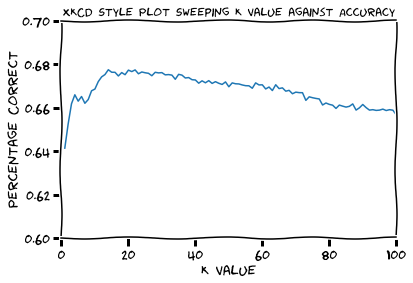

In [118]:
from matplotlib import *
font_manager._rebuild()
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

test_ac = [.67,.68,.69,.78]
k_val_test = [2,3,4,5]

k_val = np.linspace(0,k_max,k_max+1)[1:]


plt.xkcd()
plt.plot(k_val,all_ac)
plt.xlabel('K value')
plt.ylabel('Percentage Correct')
plt.savefig('sweep_k_titanic.png',bbox_inches = 'tight',pad_inches = 1)
plt.xlim((0,100))
plt.ylim((.6,.7))
plt.title("XKCD Style Plot Sweeping K value against Accuracy")
"""When this was run with k values from 1 to 100 with samples of 1000 for each, the best k was 15"""